In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data = pd.read_csv(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv


# Exploration of the datas

In [3]:
data.head(20)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [4]:
data.rename(columns = {data.iloc[:,-4].name :'Population Density (P/Km2)', "Value_co2_emissions_kt_by_country":"CO2 emissions (kilotons)"}, inplace = True)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
Entity,3649,176,Afghanistan,21
Population Density (P/Km2),3648,124,25,147


# Check the missing values

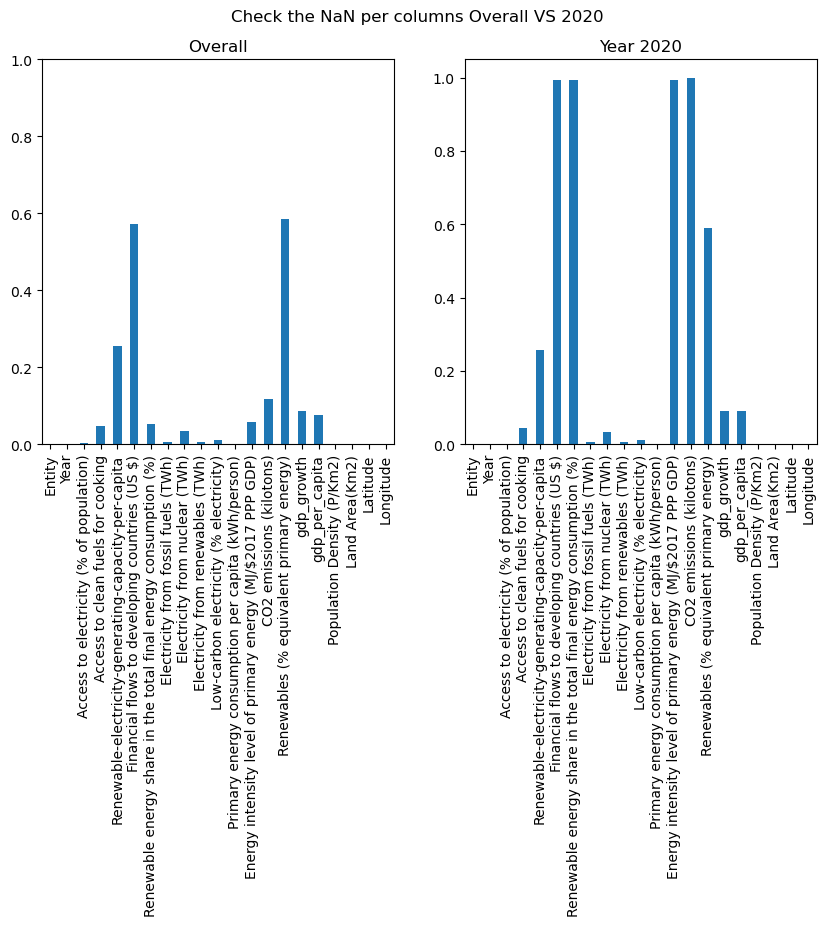

In [32]:
#Check the percentage of NaN in the different columns
dataNa = data.isna().sum()/data.shape[0]
dataNa2020 = data[data['Year']==2020].isna().sum()/data[data['Year']==2020].shape[0]
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Check the NaN per columns Overall VS 2020')

dataNa.plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Overall')
axes[0].set_ylim([0,1])

dataNa2020.plot(kind = 'bar', ax = axes[1])
axes[1].set_title('Year 2020')

plt.show()

**We have 3 columns with more than 10%.**

# /!\ : Warning with 2020 ! We have more NaN values for 2020 in several columns !
It is something we must take into account for our investigation

# Check the duplicates

In [24]:
# Finding duplicate rows
duplicate_rows = data[data.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Population Density (P/Km2),Land Area(Km2),Latitude,Longitude


In [34]:
data.to_csv('Sust_nrj_clean.csv')

We need to define our objectives : 
* CO2 emissions worldwide per year

**I adjusted the following figure since we have a NaN value for all the country in 2020 in terms of CO2 emissions**

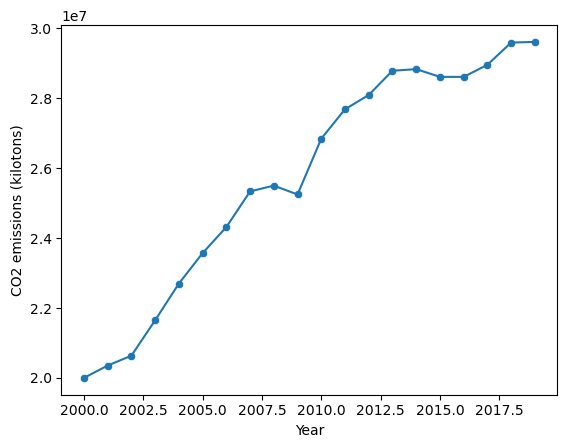

In [26]:
data_CO2Year = data[['Year', 'CO2 emissions (kilotons)']].groupby('Year').sum().reset_index()
data_CO2Year = data_CO2Year.iloc[0:20,:]
sns.scatterplot(data=data_CO2Year, x="Year", y="CO2 emissions (kilotons)")
sns.lineplot(data=data_CO2Year, x="Year", y="CO2 emissions (kilotons)")
plt.show()


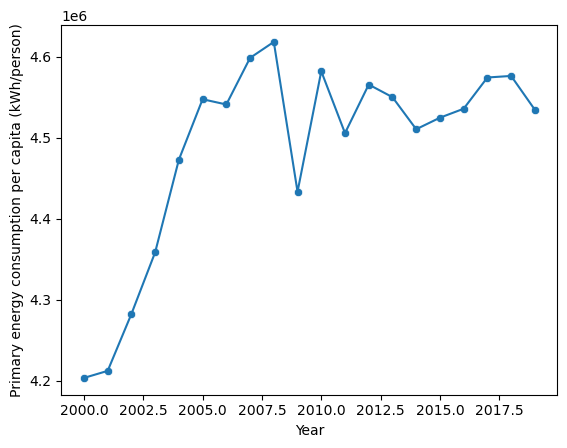

In [30]:
data_EnperCapYear = data[['Year', 'Primary energy consumption per capita (kWh/person)']].groupby('Year').sum().reset_index()
data_EnperCapYear = data_EnperCapYear.iloc[0:20,:]
sns.scatterplot(data=data_EnperCapYear, x="Year", y="Primary energy consumption per capita (kWh/person)")
sns.lineplot(data=data_EnperCapYear, x="Year", y="Primary energy consumption per capita (kWh/person)")
plt.show()